<a href="https://colab.research.google.com/github/karhol/mock-portfolio/blob/main/Diabetes__EDA_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Diabetes Prediction 

Introducction

Dataset: https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset


BMI: To express the Body mass index

DiabetesPedigreeFunction: To express the Diabetes percentage

Outcome: To express the final result 1 is Yes and 0 is No

# Import Libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import klib

from sklearn.model_selection import  GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings(action='ignore')

In [70]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [71]:
data.describe()
#data.info()
#data.columns
#data.isnull().sum()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


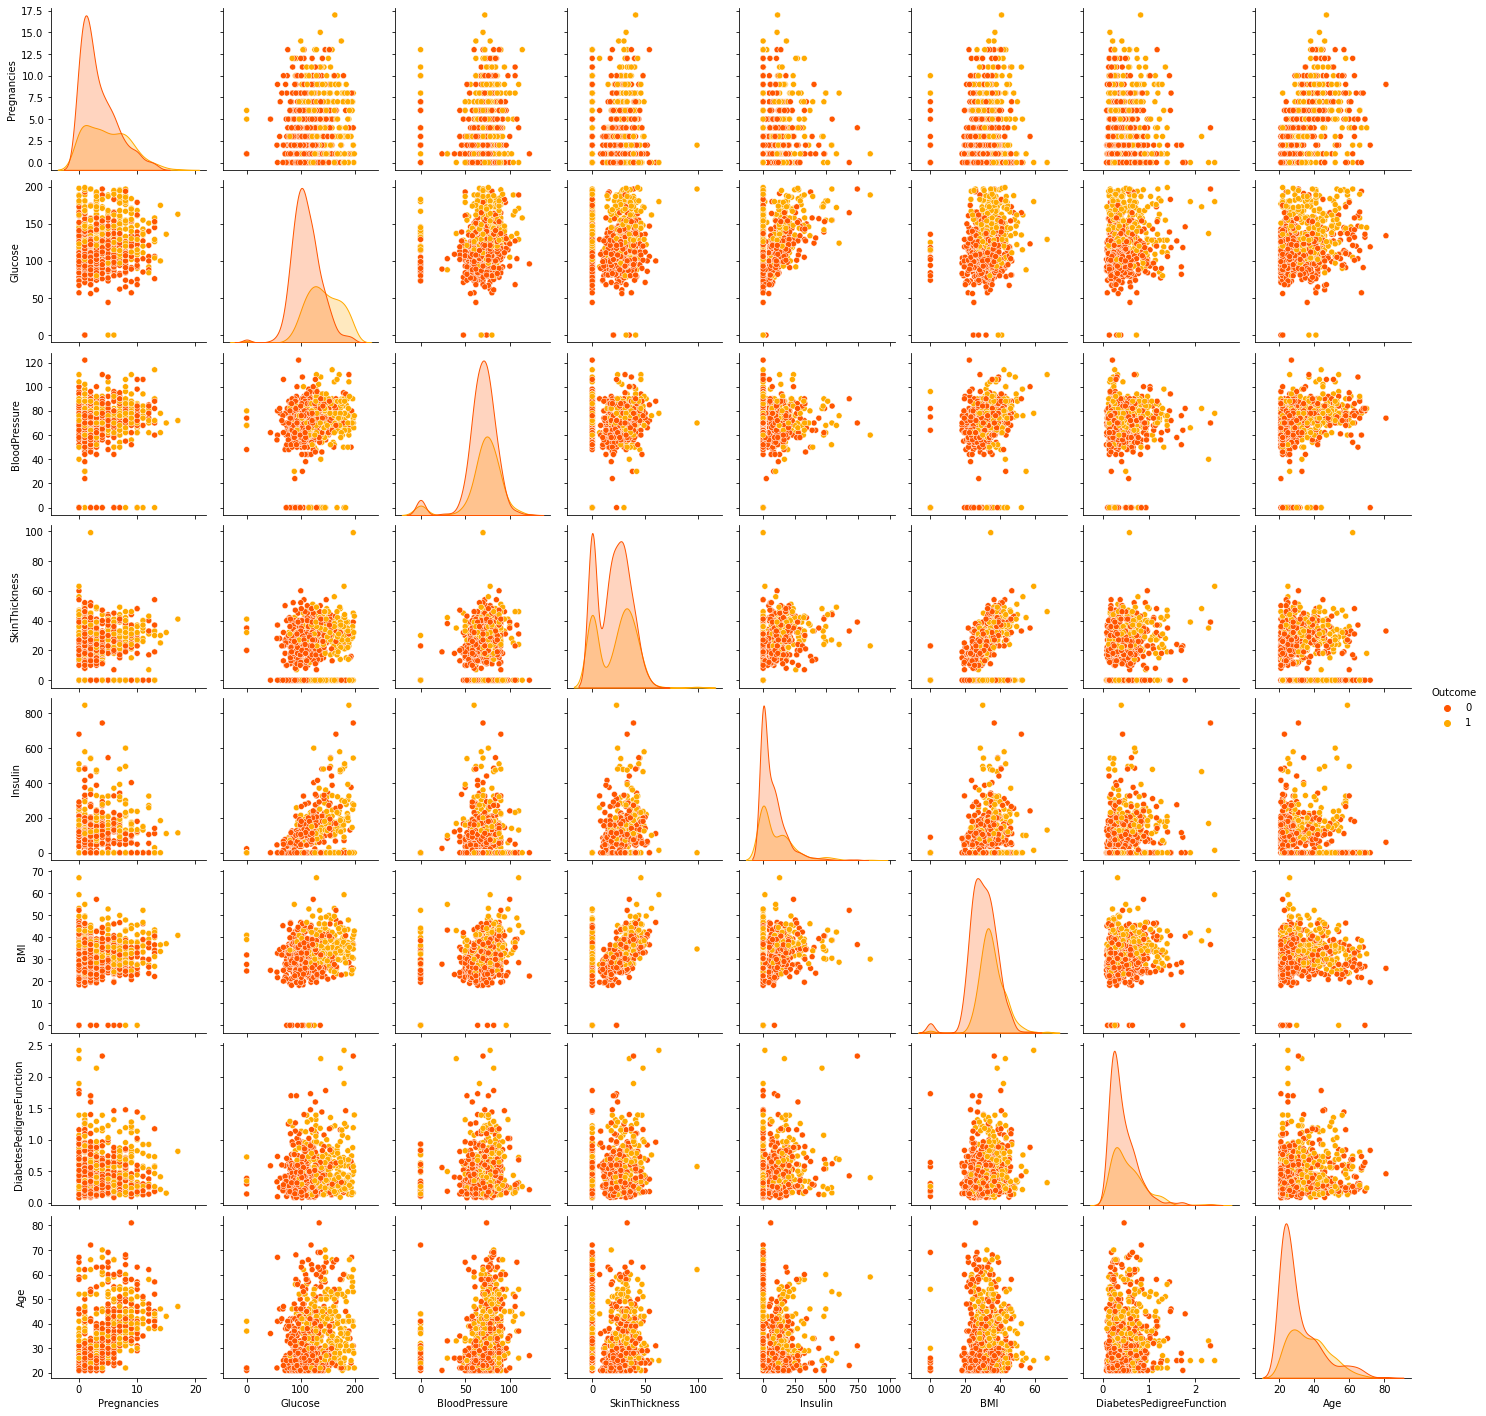

In [73]:
sns.pairplot(data, hue = "Outcome", palette="autumn")
plt.show()

Target Pie chart

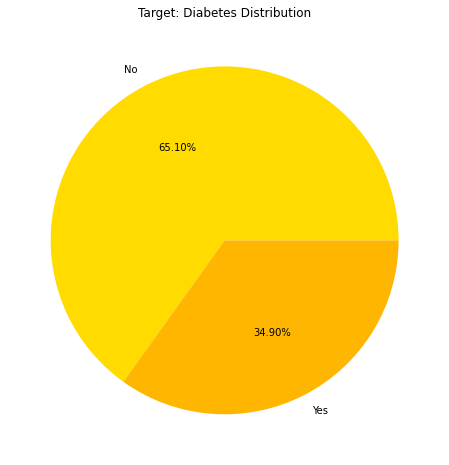

0    500
1    268
Name: Outcome, dtype: int64

In [68]:
plt.figure(figsize=(8, 8))

plt.pie(
    data['Outcome'].value_counts(),
    autopct='%.2f%%',
    labels=["No", "Yes"],
    colors=sns.color_palette('autumn_r')
)

plt.title("Target: Diabetes Distribution")
plt.show()

data.Outcome.value_counts()

Heatmap

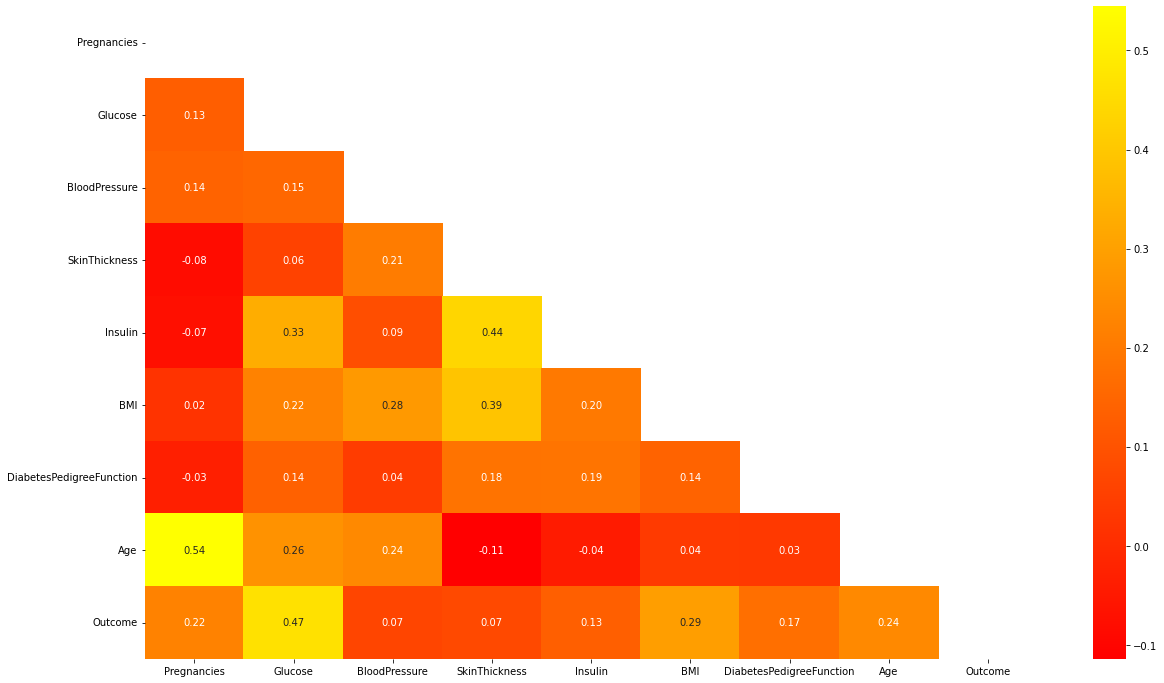

In [66]:
plt.figure(figsize = (20, 12))

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, cmap="autumn", annot = True, fmt = ".2f")
plt.show()

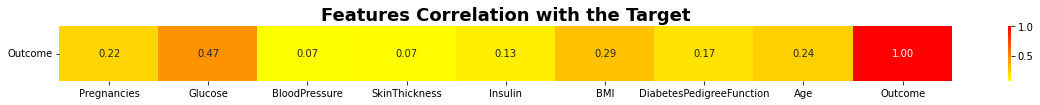

In [75]:

numeric_corr = data.corr()
f,ax=plt.subplots(figsize=(20,1))
sns.heatmap(numeric_corr.sort_values(by=["Outcome"], ascending=False).head(1), cmap="autumn_r",annot = True, fmt = ".2f")
plt.title("Features Correlation with the Target", weight="bold", fontsize=18, color="Black")
plt.yticks(color="black", rotation=0)

plt.show()



The features with highest correlation are

    Glucose : 0.47

    BMI : 0.29

    Age: 0.24


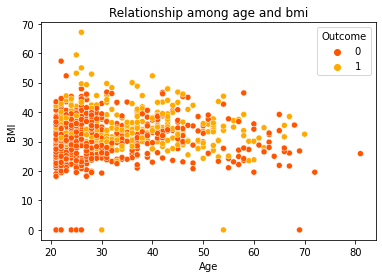

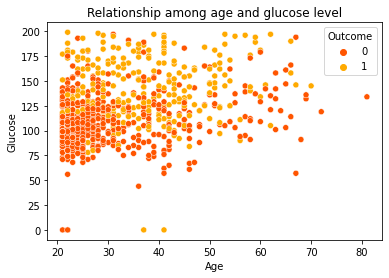

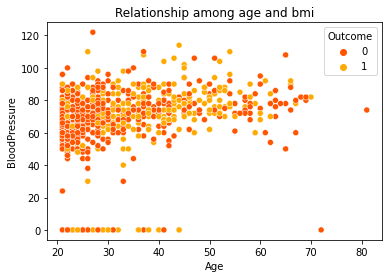

In [76]:
# making a scatterplot of age vs bmi to detect if a relationship exist
plt.figure(figsize=(6,4))
sns.scatterplot(x="Age",y="BMI",data=data,hue="Outcome", palette="autumn")
plt.title('Relationship among age and bmi')
plt.show()

# making a scatterplot of age vs glucose level to detect if a relationship exist
plt.figure(figsize=(6,4))
sns.scatterplot(x="Age",y="Glucose",data=data,hue="Outcome", palette="autumn")
plt.title('Relationship among age and glucose level')
plt.show()

# making a scatterplot of age vs blood pressure to detect if a relationship exist
plt.figure(figsize=(6,4))
sns.scatterplot(x="Age",y="BloodPressure",data=data,hue="Outcome", palette="autumn")
plt.title('Relationship among age and bmi')
plt.show()

Age

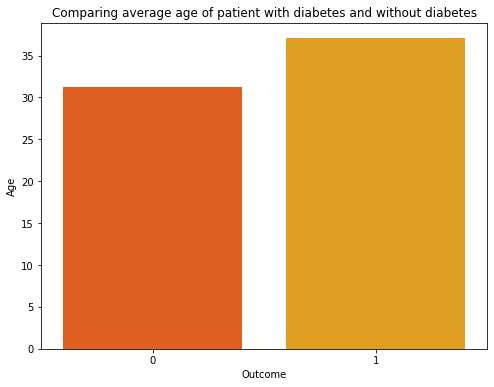

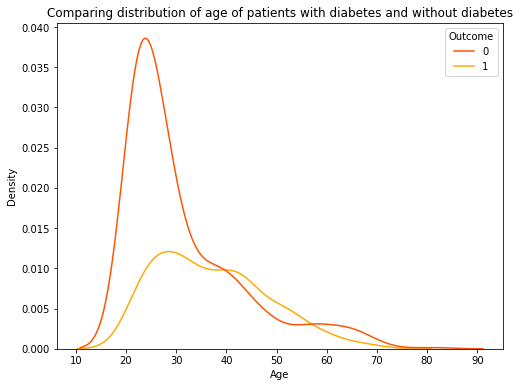

In [77]:
#Age and outcome

# seaborn bar plot gives the variable average
plt.figure(figsize=(8,6))
sns.barplot(x="Outcome",y="Age",data=data,palette="autumn", ci= False)
plt.title("Comparing average age of patient with diabetes and without diabetes")
plt.show()

# plotting kernel density estimation of age distribution of diabetic and non-diabetic patients
plt.figure(figsize=(8,6))
sns.kdeplot(x="Age",hue="Outcome",data=data, palette="autumn")
plt.title("Comparing distribution of age of patients with diabetes and without diabetes")
plt.show()

In [51]:


def preprocessing(df):
    df = df.copy()
    
    # Split df into X and y
    y = df['Outcome']
    X = df.drop('Outcome', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test
   
     


In [52]:

X_train, X_test, y_train, y_test = preprocessing(data)

In [53]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier(),
    "                               XGBoost": XGBClassifier(eval_metric='mlogloss'),
    "                              LightGBM": LGBMClassifier(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.
                               XGBoost trained.
                              LightGBM trained.


In [56]:
test_accuracy = []
accuracy = []
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))
    test_accuracy.append(model.score(X_test, y_test) * 100)
    accuracy.append(model.score(X_train,y_train))

                   Logistic Regression: 78.35%
                   K-Nearest Neighbors: 79.22%
                         Decision Tree: 70.56%
Support Vector Machine (Linear Kernel): 78.35%
   Support Vector Machine (RBF Kernel): 79.22%
                        Neural Network: 80.52%
                         Random Forest: 79.22%
                     Gradient Boosting: 79.65%
                               XGBoost: 79.65%
                              LightGBM: 76.62%


In [79]:
models1 = [item.strip() for item in list(models.keys())]

model_results = pd.DataFrame(
    {'Model': models1,
     'Test_score': test_accuracy,
     'Train_score': accuracy
    })

display(model_results.style.background_gradient(cmap='autumn_r'))

,Model,Test_score,Train_score
0,Logistic Regression,78.354978,0.774674
1,K-Nearest Neighbors,79.220779,0.808194
2,Decision Tree,70.562771,1.000000
3,Support Vector Machine (Linear Kernel),78.354978,0.778399
4,Support Vector Machine (RBF Kernel),79.220779,0.826816
5,Neural Network,80.519481,0.811918
6,Random Forest,79.220779,1.000000
7,Gradient Boosting,79.653680,0.934823
8,XGBoost,79.653680,0.895717
9,LightGBM,76.623377,1.000000


Three Best Models:



*   Neural Network
*   Gradient Boosting
*   XGBoost



We can see that 3 models overfitted the dataset:


*   Decision Tree
*   Random Forest
*   LightGBM



lets look inside an Overfitting Decision Tree model

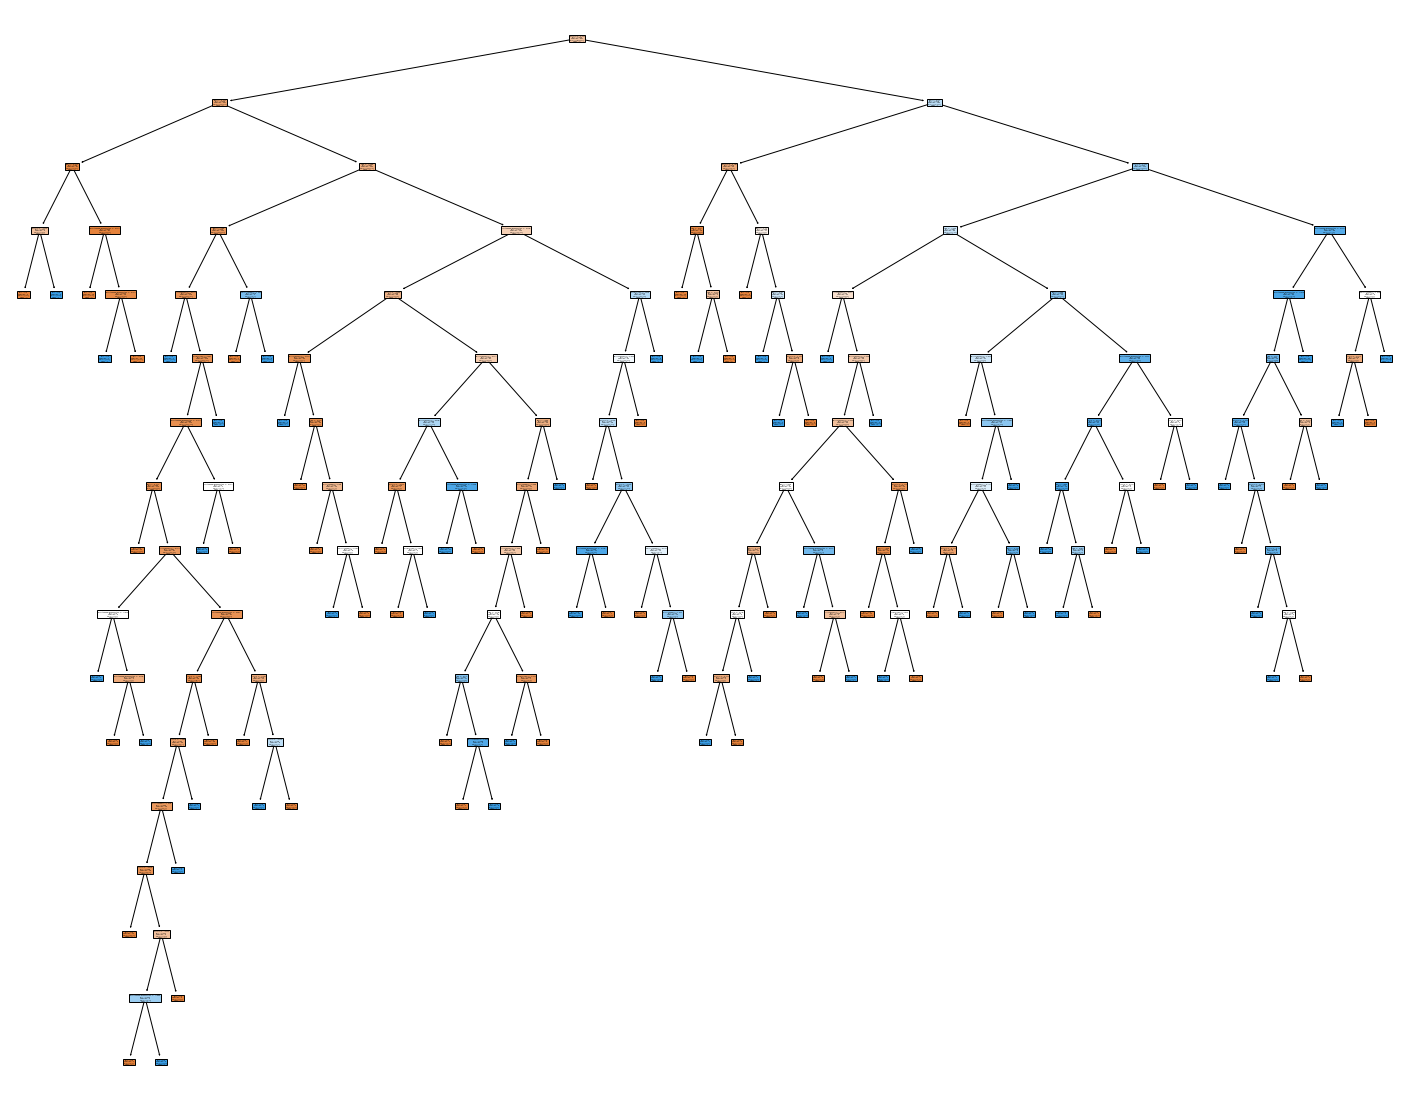

In [58]:
from sklearn import tree


dtc = DecisionTreeClassifier()
dtc.fit(X_train , y_train)

feature_names = ['Pregnancies', 'Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
target_names = ['0', '1']
fig = plt.figure(figsize = (25 , 20))
plot = tree.plot_tree(dtc,
                     feature_names = feature_names,
                     class_names = target_names,
                     filled = True)
fig.savefig('tree.png')

In [63]:
y_pred = dtc.predict(X_test)

print('Accuracy:    ', metrics.accuracy_score(y_test, y_pred) * 100)
print("Test Score:  ", model.score(X_test, y_test) * 100)
print("Train_Score: ", model.score(X_train,y_train) * 100)

Accuracy:     68.83116883116884
Test Score:   76.62337662337663
Train_Score:  100.0


References:


https://medium.com/analytics-vidhya/pairplot-visualization-16325cd725e6

https://www.kaggle.com/code/asimislam/python-colors-color-cmap-palette

